In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
import sys
sys.path.append("/home/zamaan/codes/nsxtool/develop/build/swig")
import pynsx

In [40]:
plt.rcParams['figure.figsize'] = [20,20]
def plot_region(region_data, start_frame, end_frame):
    nframes = region_data.nFrames()
    fig = plt.figure(1)
    count = 1
    for i in range(start_frame, end_frame):
        ax = fig.add_subplot(1, nframes, count
        ax.imshow(region_data.frame(i), cmap="Blues", vmin=0, vmax=3000)
        ax.imshow(region_data.mask(i), cmap='Reds', interpolation=None, alpha=0.3)
        count += 1

In [3]:
filename = "integration.nsx"
name = "CrChiA"
detector = "BioDiff2500"
found = "found"
pxsum_integrated = "pxsum"
prof3d_integrated = "3dprof"
frame = 80

In [4]:
expt = pynsx.Experiment(name, detector)
expt.loadFromFile(filename)
det = expt.getDiffractometer().detector()
numors = expt.getAllData()
data = numors[0].frame(frame)

In [32]:
found_peaks = expt.getPeakCollection(found)
pxsum_peaks = expt.getPeakCollection(pxsum_integrated)
prof3d_peaks = expt.getPeakCollection(prof3d_integrated)
found_peaks.setMillerIndices()
pxsum_peaks.setMillerIndices()
prof3d_peaks.setMillerIndices()
print(found_peaks.numberOfPeaks())
print(pxsum_peaks.numberOfPeaks())
print(prof3d_peaks.numberOfPeaks())

h = 4
k = 11
l = -7
hkl1 = pynsx.MillerIndex(h, k, l)
hkl2 = pynsx.MillerIndex(-h, -k, l)

found_peak = found_peaks.findPeakByIndex(hkl2)
pxsum_peak = pxsum_peaks.findPeakByIndex(hkl1)
prof3d_peak = prof3d_peaks.findPeakByIndex(hkl1)

print(found_peak.correctedIntensity().value())
print(pxsum_peak.correctedIntensity().value())
print(prof3d_peak.correctedIntensity().value())
print(found_peak.shape().center())
print(pxsum_peak.shape().center())
print(prof3d_peak.shape().center())

4643
58851
58851
123057.36146055837
122348.92644395384
335282.9987370589
[[1141.39103225]
 [ 246.31668544]
 [  61.7550768 ]]
[[1141.37304957]
 [ 246.45031805]
 [  61.79810291]]
[[1141.29249442]
 [ 246.99083714]
 [  61.99026929]]


In [18]:
peak_end = 3.0
bkg_begin = 3.0
bkg_end = 6.0
found_region = pynsx.IntegrationRegion(found_peak, peak_end, bkg_begin, bkg_end)
pxsum_region = pynsx.IntegrationRegion(pxsum_peak, peak_end, bkg_begin, bkg_end)
prof3d_region = pynsx.IntegrationRegion(prof3d_peak, peak_end, bkg_begin, bkg_end)
found_data = pxsum_region.getRegion(True)
pxsum_data = pxsum_region.getRegion(True)
prof3d_region = prof3d_region.getRegion(True)

In [41]:
plot_region(found_data, 5, 13)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 1440x1440 with 0 Axes>

(35, 18)
(35, 18)


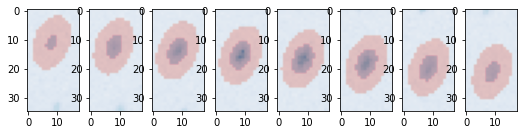

In [37]:
plot_region(pxsum_data, 5 ,13)
print(pxsum_data.mask(8).shape)
print(pxsum_data.frame(8).shape)

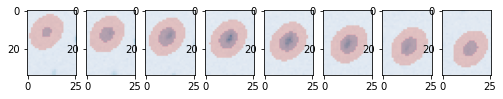

In [38]:
plot_region(prof3d_region, 5, 13)